## Visual Analytics Coursework
## World Happiness Before and During Covid19

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("world-happiness-report-2015-2022-cleaned.csv")
df = df.iloc[:,2:]
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
1224,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

There are no missing value in the original dataset

In [4]:
#df.columns = df.columns.str.replace(" ", "")
#df.replace(' ', '_', regex=True,inplace = True)


In [5]:
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
1224,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


We delete the space between words in the header and replace spaces in the dataframe by underscore

In [6]:
df.dtypes

Country                          object
Region                           object
Happiness Score                  object
Economy (GDP per Capita)         object
Family (Social Support)          object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Year                              int64
dtype: object

We found that the numeric features are in object data type.
The reason is came from the 2022 dataset, the "." inside 2022 dataset are ",",
so we first replace "," by "."

In [7]:
df[df.Year == 2022]

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1083,Finland,Western Europe,"7,821","1,892","1,258","0,775","0,736","0,534","0,109",2022
1084,Denmark,Western Europe,"7,636","1,953","1,243","0,777","0,719","0,532","0,188",2022
1085,Iceland,Western Europe,"7,557","1,936","1,320","0,803","0,718","0,191","0,270",2022
1086,Switzerland,Western Europe,"7,512","2,026","1,226","0,822","0,677","0,461","0,147",2022
1087,Netherlands,Western Europe,"7,415","1,945","1,206","0,787","0,651","0,419","0,271",2022
...,...,...,...,...,...,...,...,...,...,...
1224,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [8]:
factors = ["Happiness Score","Economy (GDP per Capita)","Family (Social Support)",
           "Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
for factor in factors:    
    df[factor].replace(',','.',regex = True, inplace = True)
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
1224,Botswana*,-,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,Rwanda*,-,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


Then we convert all the numeric features into numeric datatype

In [9]:
df['Happiness Score']= pd.to_numeric(df['Happiness Score'])
df['Economy (GDP per Capita)']= pd.to_numeric(df['Economy (GDP per Capita)'])
df['Family (Social Support)']= pd.to_numeric(df['Family (Social Support)'])
df['Health (Life Expectancy)']= pd.to_numeric(df['Health (Life Expectancy)'])
df['Freedom']= pd.to_numeric(df['Freedom'])
df['Trust (Government Corruption)']= pd.to_numeric(df['Trust (Government Corruption)'])
df['Generosity']= pd.to_numeric(df['Generosity'])
df.Year = df.Year.astype('float64')

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family (Social Support)          float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                             float64
dtype: object

The data pre-processing in done right now. To compare the performance between before and after covid19,
we would separate the data into two parts: 2015-2019, 2020-2022
This imply human decision as we knew what is the time when covid-19 starts affecting people's living

In [11]:
dfBC = df[df.Year<2020]# This is the dataset before covid-19
dfAC = df[df.Year>2019]# This is the dataset during covid-19

In [12]:
dfBC

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015.0
...,...,...,...,...,...,...,...,...,...,...
776,Rwanda,Sub-Saharan Africa,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019.0
777,Tanzania,Sub-Saharan Africa,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019.0
778,Afghanistan,Southern Asia,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019.0
779,Central African Republic,Sub-Saharan Africa,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019.0


In [13]:
dfAC

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
781,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020.0
782,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2020.0
783,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,2020.0
784,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,2020.0
785,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,2020.0
...,...,...,...,...,...,...,...,...,...,...
1224,Botswana*,-,3.4710,1.503000,0.815000,0.280000,0.571000,0.102000,0.012000,2022.0
1225,Rwanda*,-,3.2680,0.785000,0.133000,0.462000,0.621000,0.544000,0.187000,2022.0
1226,Zimbabwe,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.105000,0.106000,2022.0
1227,Lebanon,Middle East and Northern Africa,2.9550,1.392000,0.498000,0.631000,0.103000,0.034000,0.082000,2022.0


For the before covid-19 dataset, there are 781 rows x 11 columns,
the dataset during covid-19 consists of 448 rows and 11 columns.
The dataset during covid-19 is smaller than the dataset before covid-19, because the World Happiness Report was
start from 2015, the dataset before covid-19 consists of 5 years data. Consider the timeline of COVID-19, it started to spread at the end of 2019 and most of the countries started their epidemic prevention policy in 2020, we picked data from 2020 to 2022 as the dataset representing world happiness during COVID-19. This decision involoves human decisions.

In [14]:
dfBC.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,781.0,5.377232,1.127071,2.693,4.50900,5.321000,6.182000,7.769000
Economy (GDP per Capita),781.0,0.914537,0.405403,0.000,0.60500,0.982000,1.233748,1.870766
Family (Social Support),781.0,1.078780,0.329581,0.000,0.87021,1.125000,1.328000,1.644000
Health (Life Expectancy),781.0,0.612342,0.248459,0.000,0.44006,0.647239,0.808000,1.141000
Freedom,781.0,0.411254,0.152911,0.000,0.31048,0.431000,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.105816,0.000,0.05400,0.091000,0.156030,0.551910
Generosity,781.0,0.218618,0.122394,0.000,0.13000,0.202000,0.279060,0.838075
Year,781.0,2016.992318,1.417814,2015.000,2016.00000,2017.000000,2018.000000,2019.000000


In [15]:
dfAC.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,448.0,5.519243,1.089442,2.404,4.781475,5.535750,6.266650,7.842000
Economy (GDP per Capita),448.0,1.081348,0.462100,0.000,0.774091,1.097330,1.404500,2.209000
Family (Social Support),448.0,0.953723,0.314484,0.000,0.763250,0.982270,1.180960,1.547567
Health (Life Expectancy),448.0,0.600656,0.228482,0.000,0.436787,0.619000,0.774250,1.137814
Freedom,448.0,0.492748,0.143081,0.000,0.404605,0.512000,0.603092,0.740000
Trust (Government Corruption),448.0,0.140031,0.118587,0.000,0.060311,0.105794,0.178000,0.587000
Generosity,448.0,0.171920,0.095721,0.000,0.101000,0.158262,0.227757,0.569814
Year,448.0,2020.984375,0.817716,2020.000,2020.000000,2021.000000,2022.000000,2022.000000


Text(0.5, 1.0, '2015-2019')

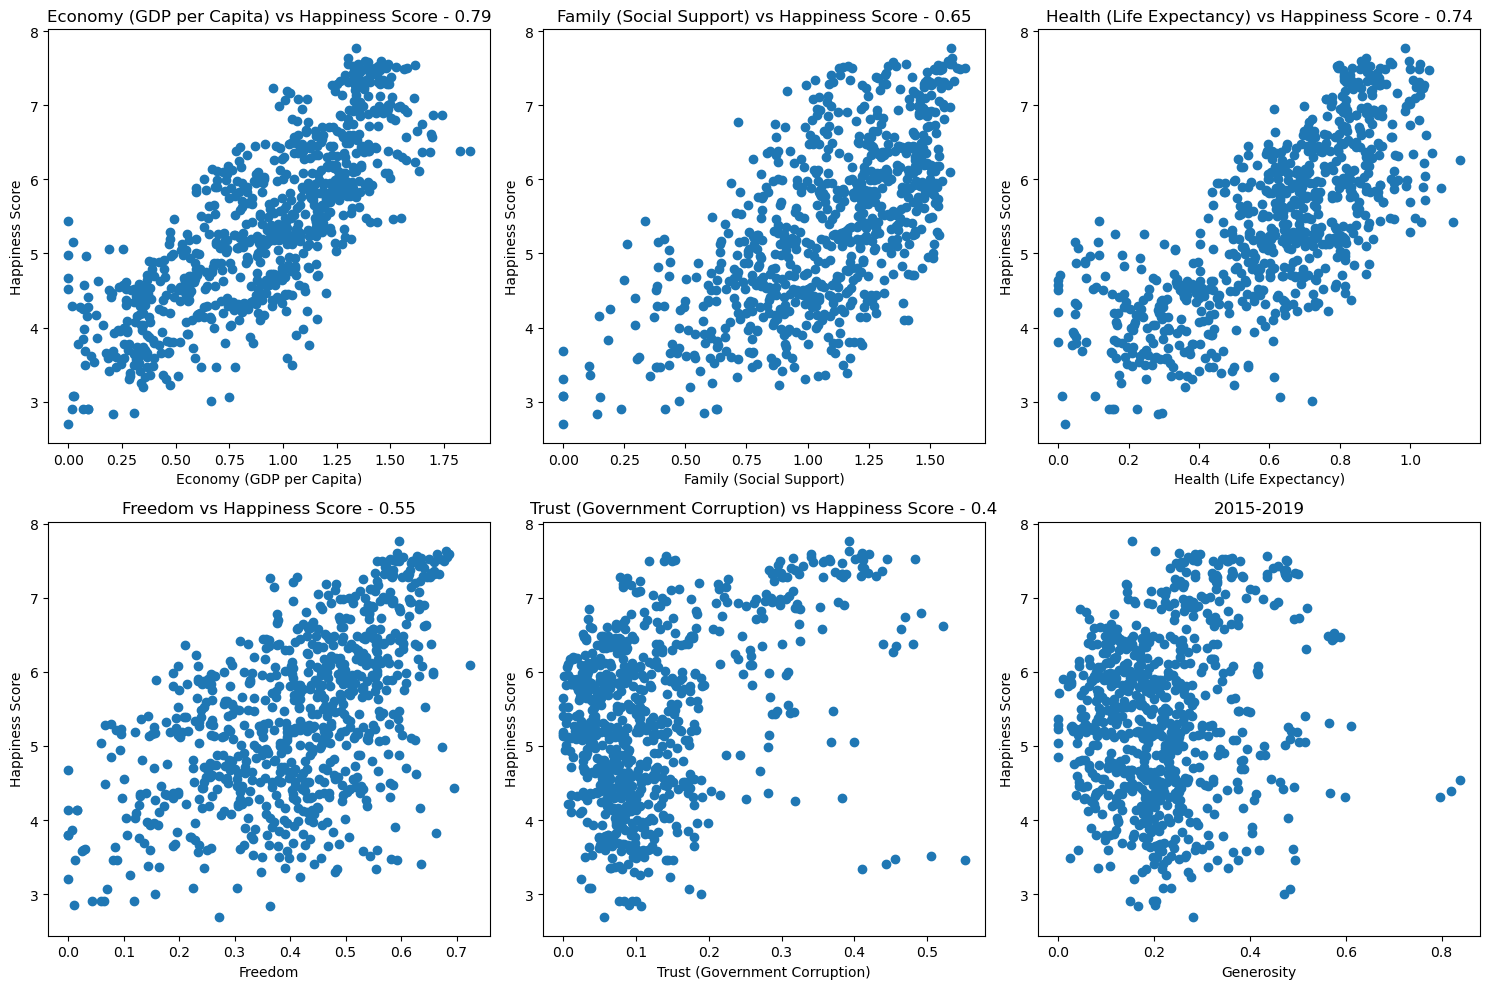

In [16]:
from scipy import stats
factors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in factors:
    plt.subplot(2,3,count)
    plt.scatter(dfBC[factor],dfBC["Happiness Score"])
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
    plt.title(factor + " vs " + "Happiness Score" + " - " + str(round(stats.pearsonr(dfBC[factor].values, dfBC["Happiness Score"])[0],2)))
    count = count + 1
plt.tight_layout()
plt.title("2015-2019")

The figure above is the 

Text(0.5, 1.0, '2015-2019')

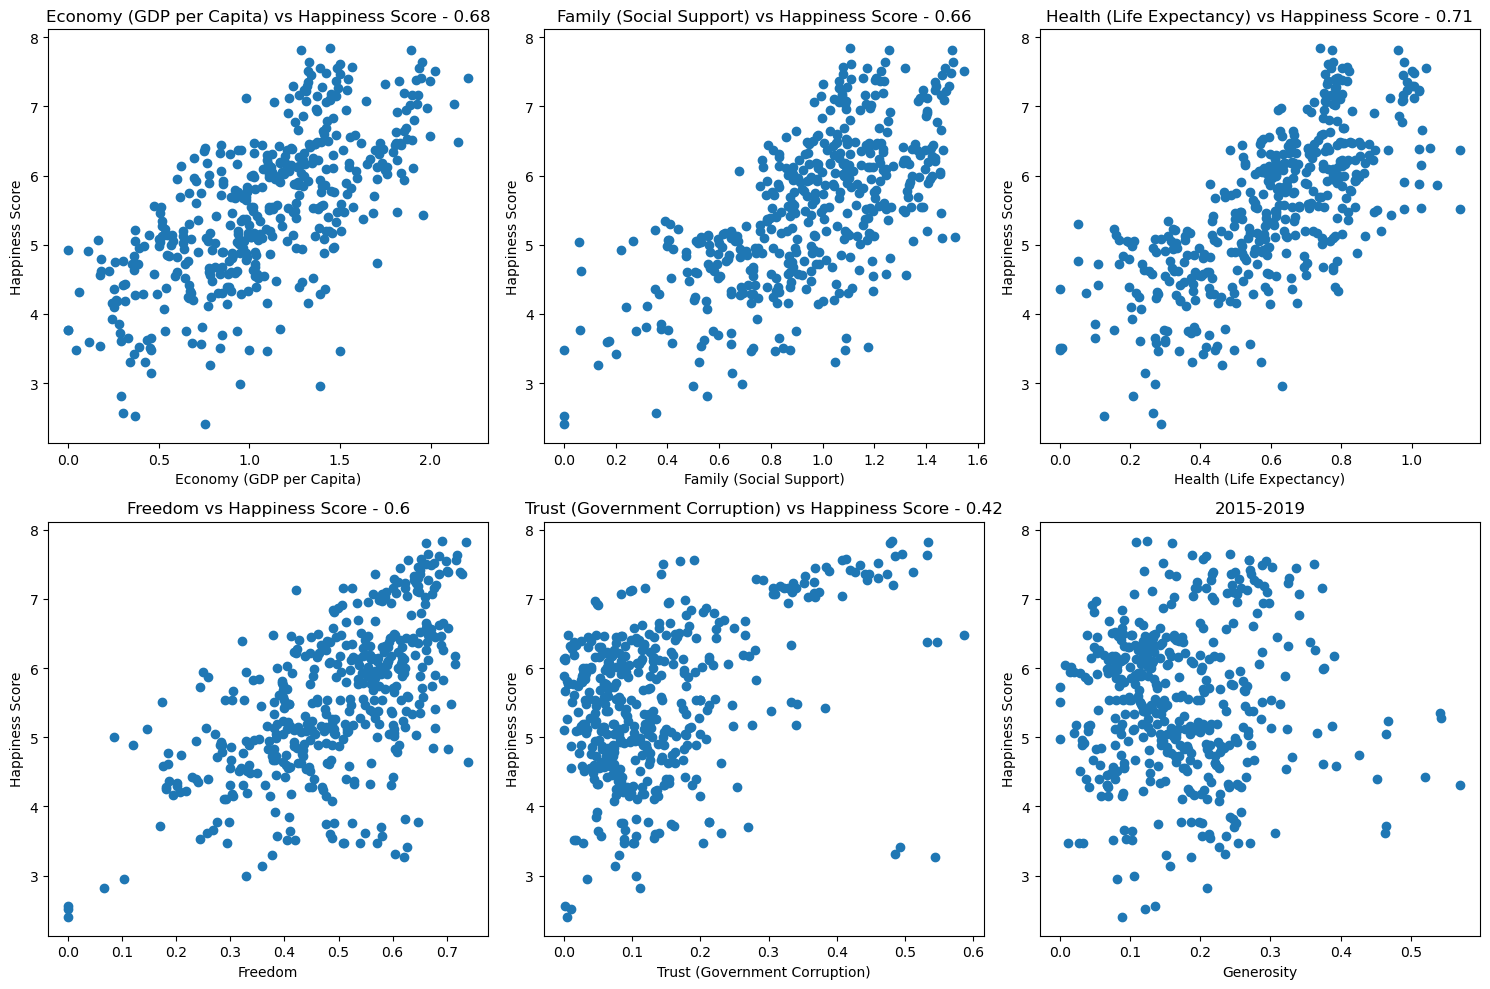

In [17]:
factors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in factors:
    plt.subplot(2,3,count)
    plt.scatter(dfAC[factor],dfAC["Happiness Score"])
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
    plt.title(factor + " vs " + "Happiness Score" + " - " + str(round(stats.pearsonr(dfAC[factor].values, dfAC["Happiness Score"])[0],2)))
    count = count + 1
plt.tight_layout()
plt.title("2015-2019")

<AxesSubplot:xlabel='Year', ylabel='Happiness Score'>

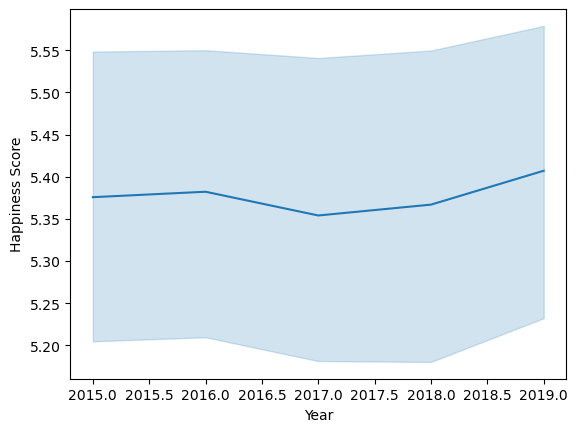

In [18]:
sns.lineplot(data=dfBC,x = "Year",y="Happiness Score")

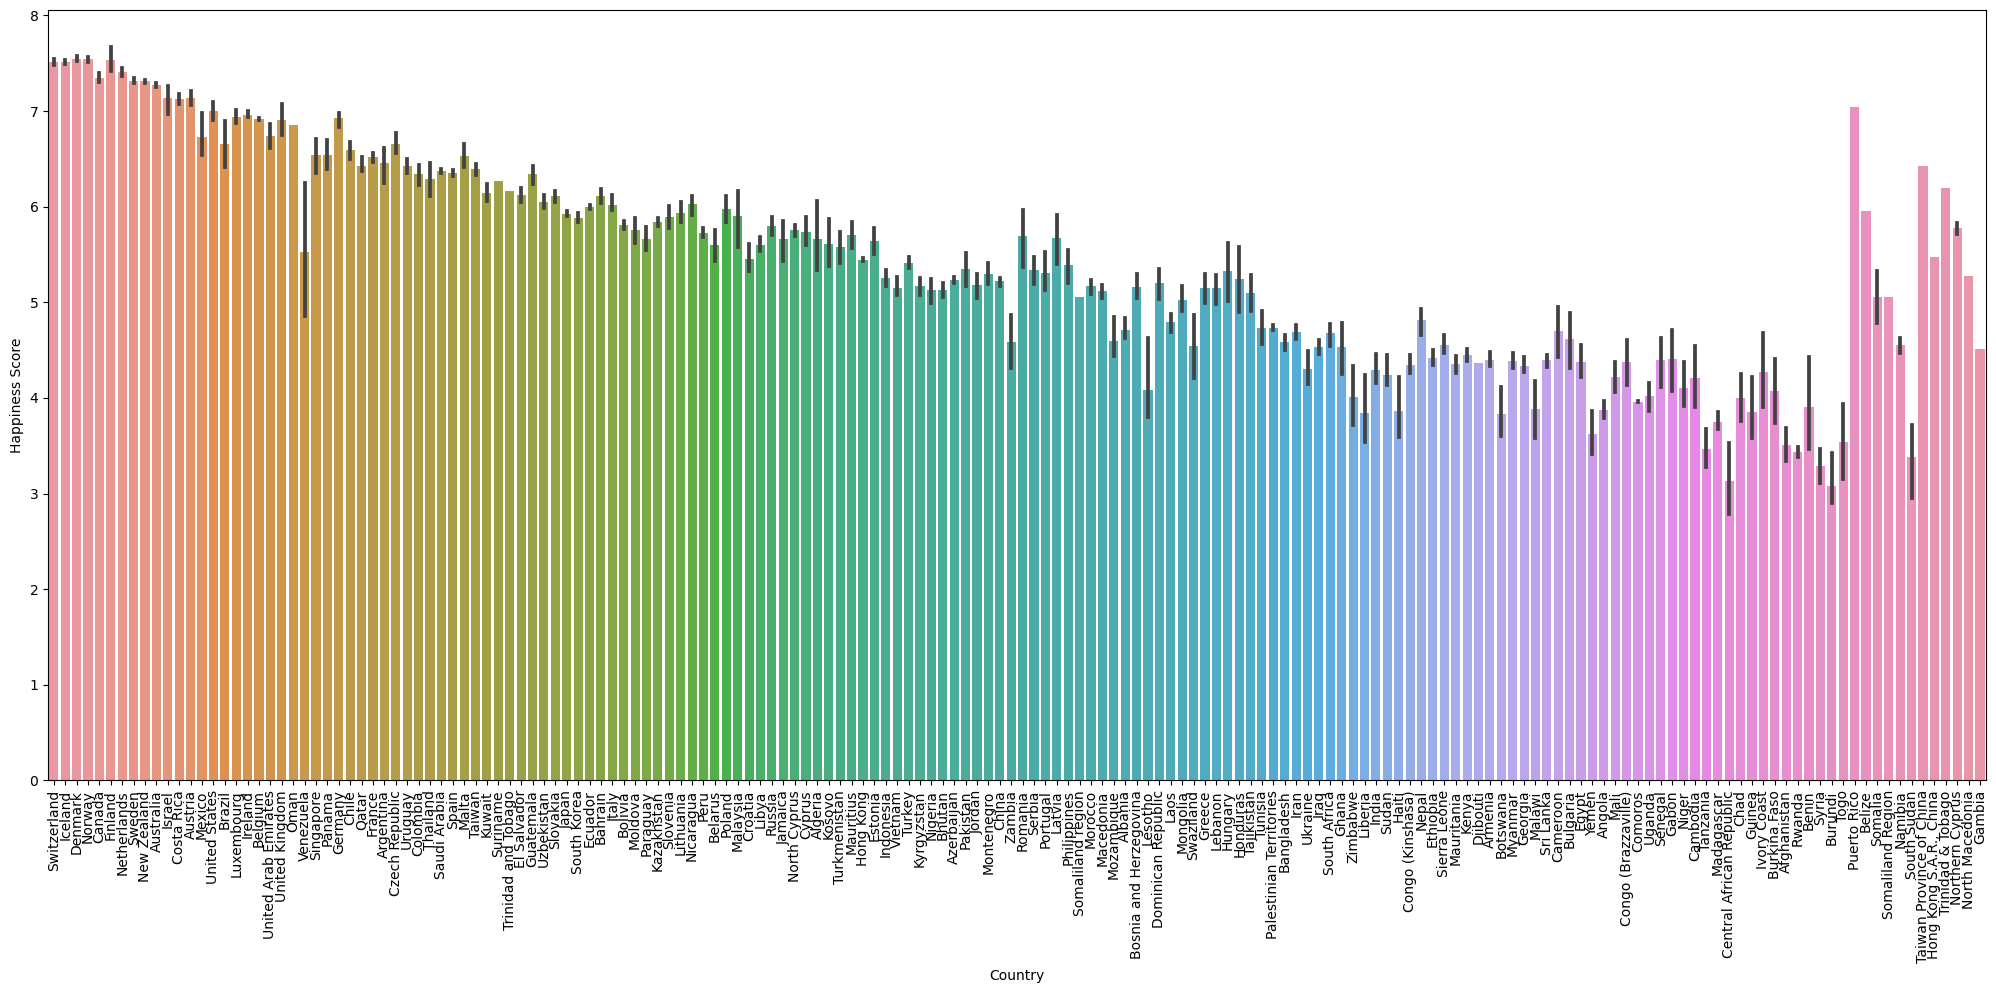

In [19]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Happiness Score', data=dfBC)
plt.xticks(rotation=90)
plt.show()

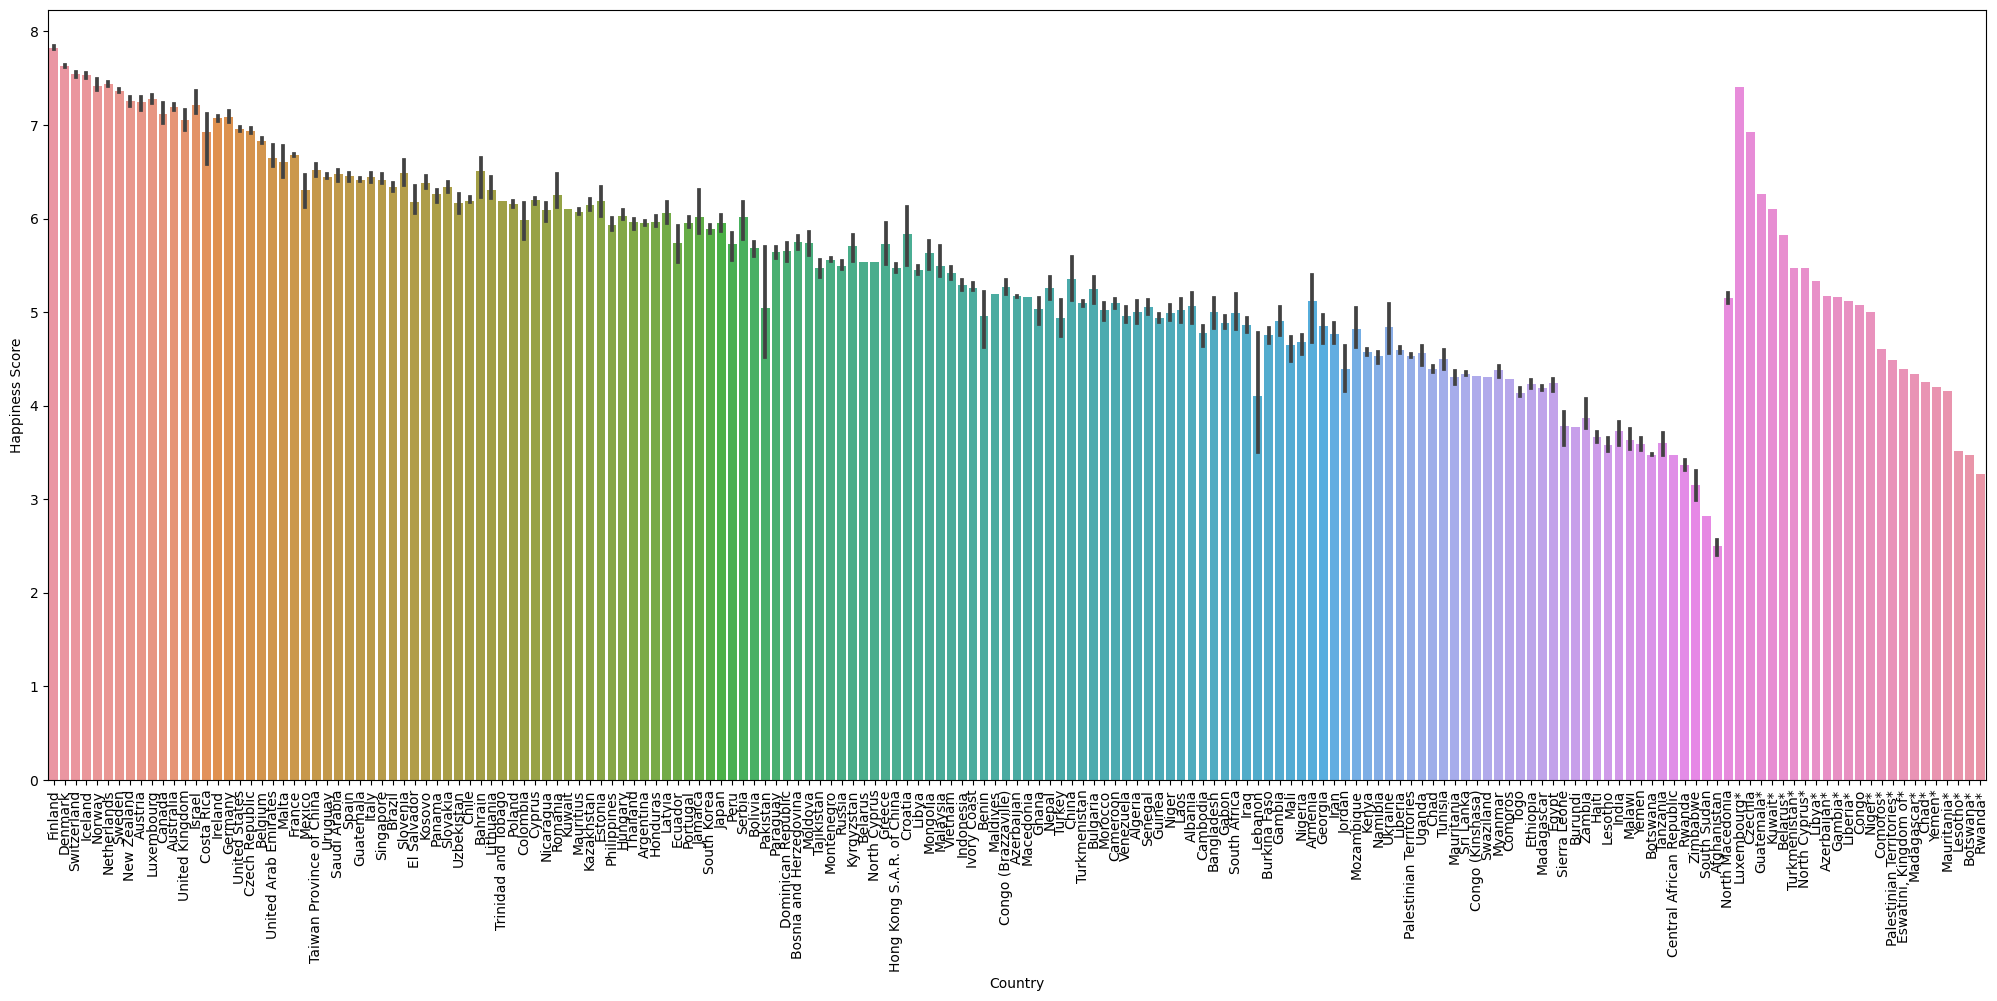

In [20]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Happiness Score', data=dfAC)
plt.xticks(rotation=90)
plt.show()

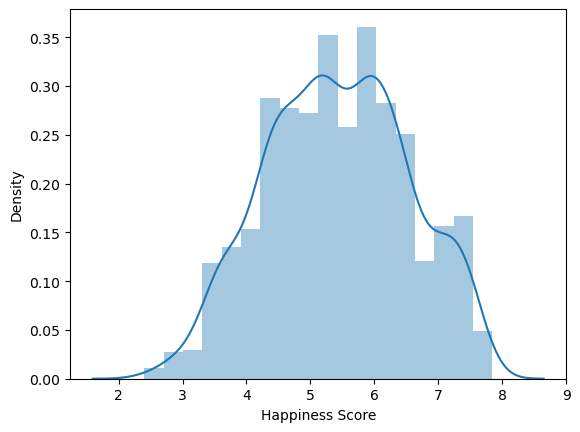

In [21]:
sns.distplot(df['Happiness Score'])
plt.show()

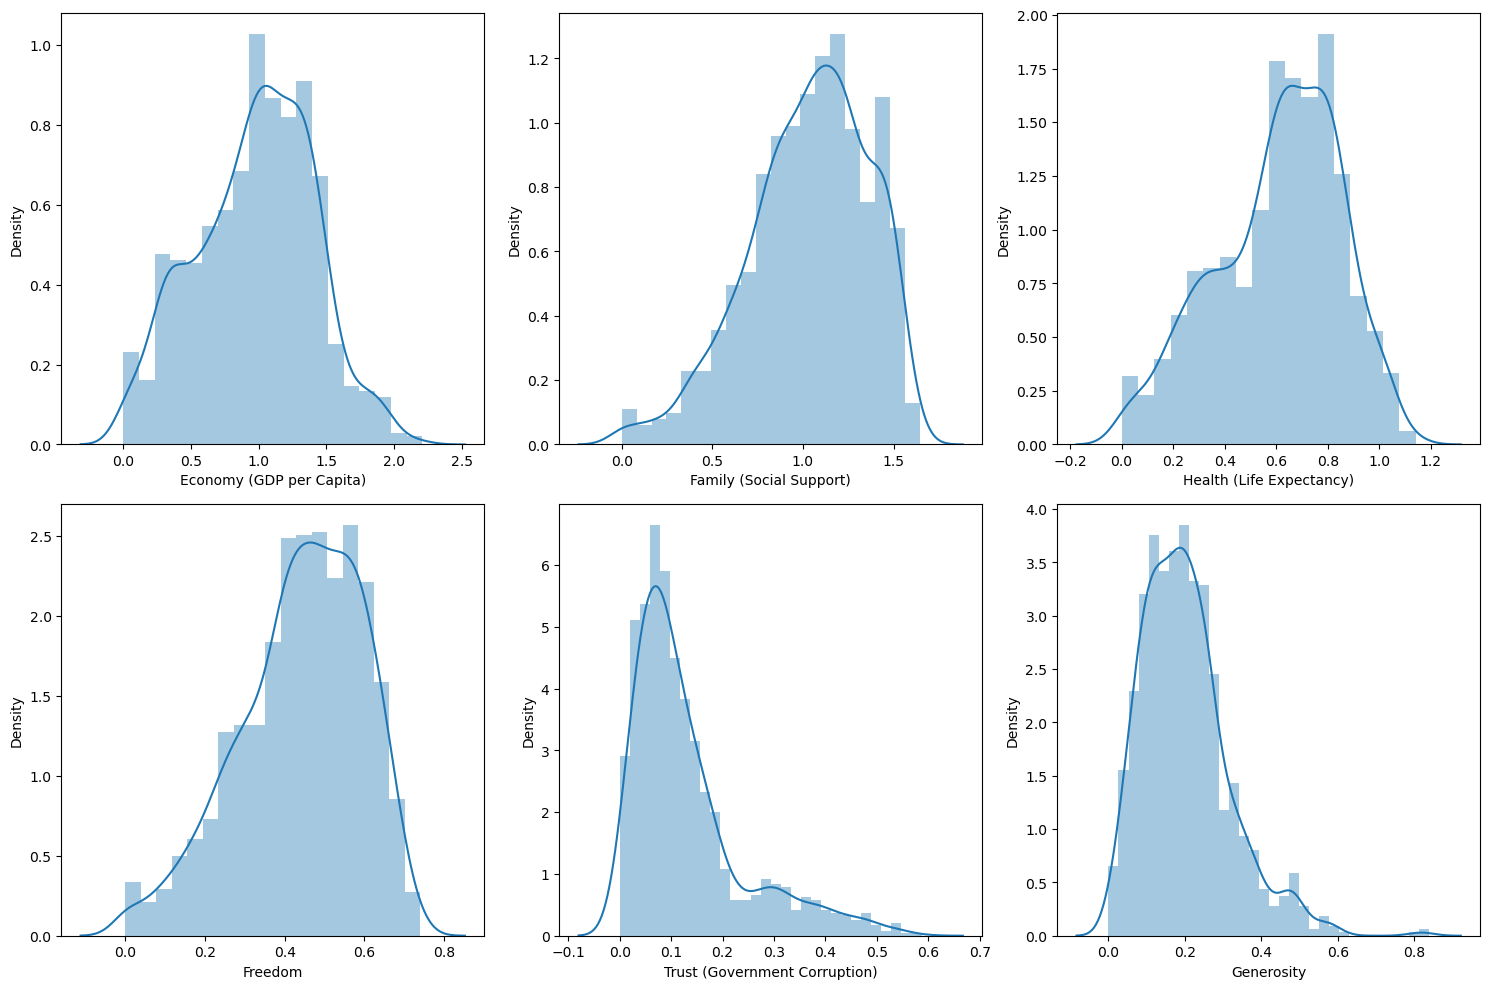

In [22]:
factors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in factors:
    plt.subplot(2,3,count)
    sns.distplot(df[factor])
    count = count + 1
plt.tight_layout()

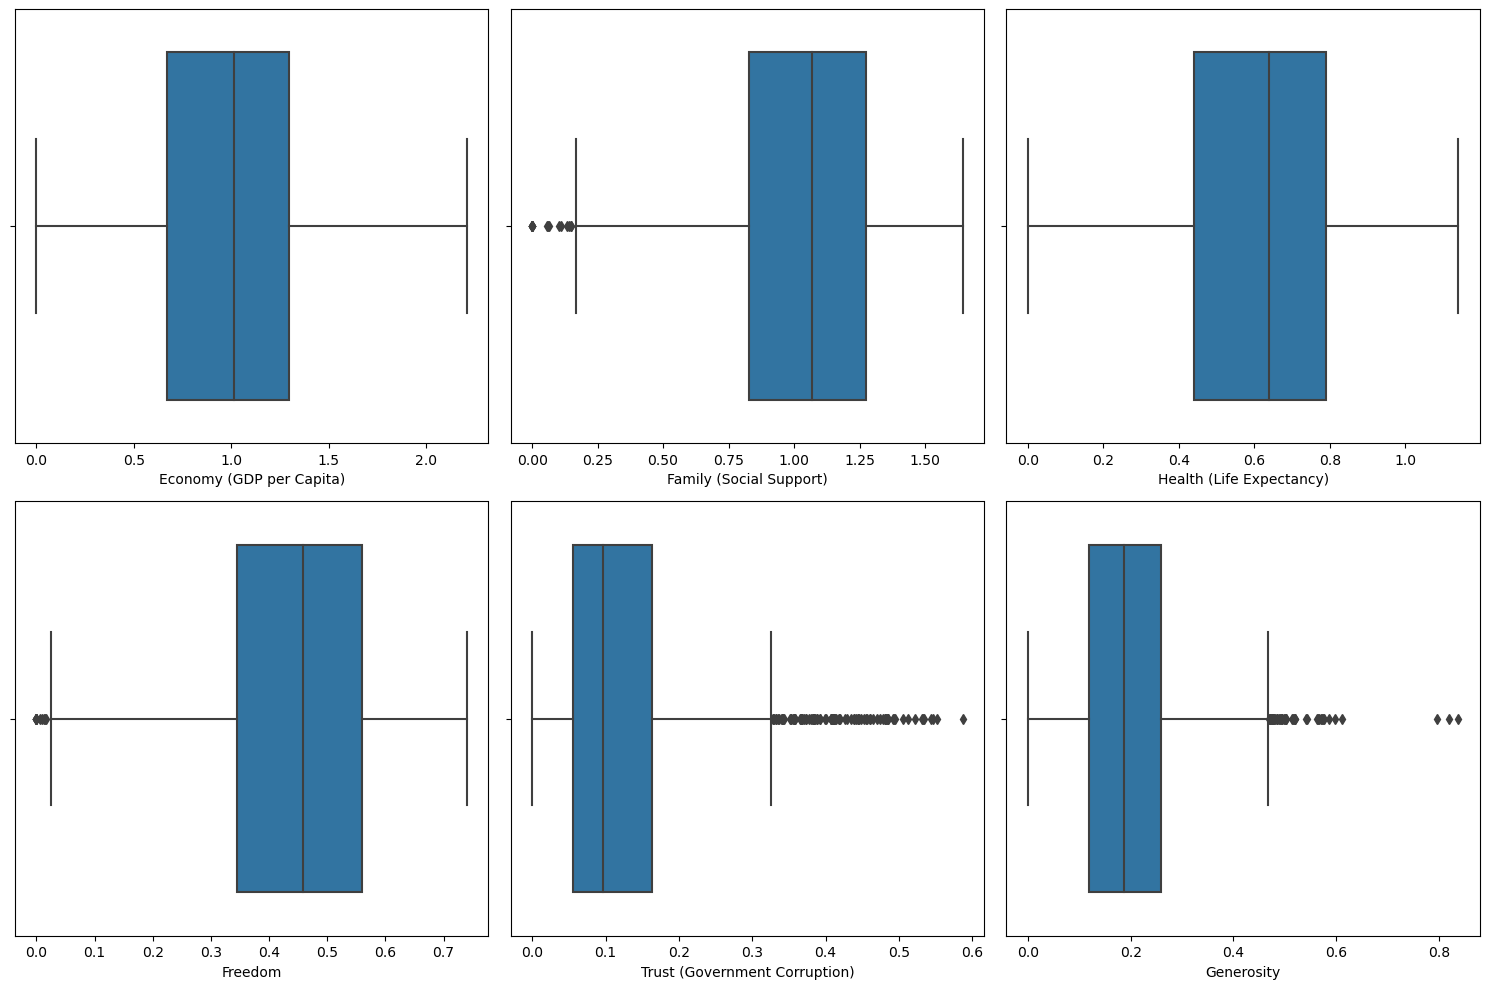

In [23]:
factors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in factors:
    plt.subplot(2,3,count)
    sns.boxplot(df[factor])
    count = count + 1
plt.tight_layout()

In [24]:
time_df = df.copy()
time_df = time_df.groupby('Year')["Happiness Score","Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"].mean()
time_df

,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Year,,,,,,,
2015.0,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
2016.0,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
2017.0,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883
2018.0,5.366897,0.883677,1.216058,0.596877,0.455606,0.112000,0.180974
2019.0,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846
2020.0,5.473240,0.868771,1.155607,0.692869,0.463583,0.130718,0.189375
2021.0,5.532839,0.977161,0.793315,0.520161,0.498711,0.135141,0.178047
2022.0,5.553575,1.410445,0.905863,0.586171,0.517226,0.154781,0.147377


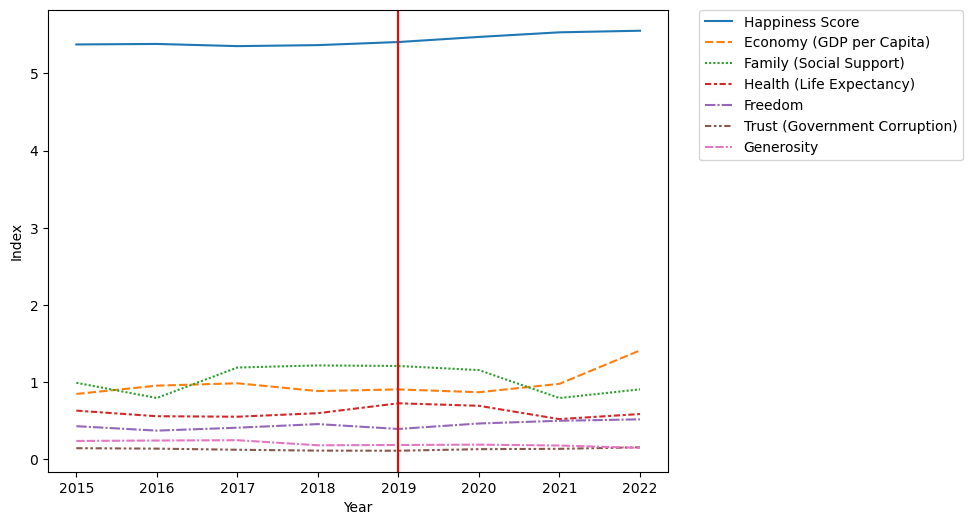

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(data=time_df)
plt.axvline(2019,c="r")
plt.ylabel("Index")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [26]:
len(df['Region'].unique())

17

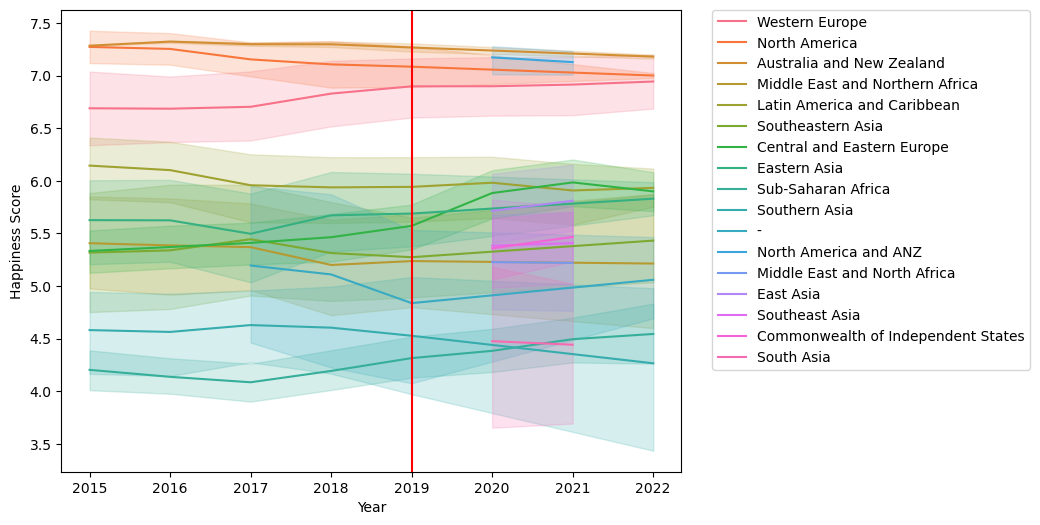

In [27]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Year",y="Happiness Score",hue="Region")
plt.axvline(2019,c="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

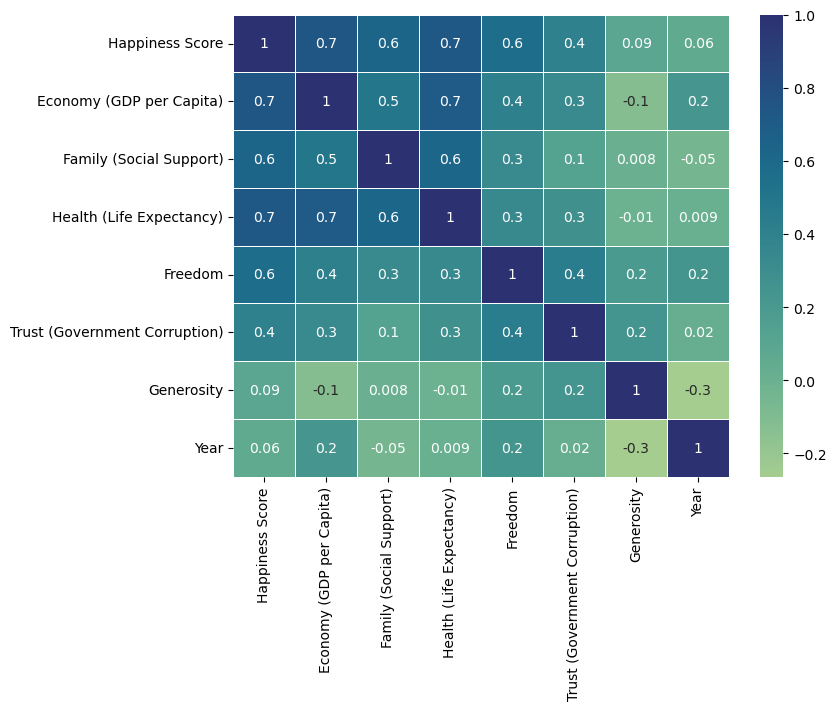

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="crest", linewidths=0.5);

In [29]:
df.loc[df['Happiness Score']==max(df['Happiness Score']),['Country','Year','Happiness Score','Region']]

,Country,Year,Happiness Score,Region
934,Finland,2021.0,7.842,Western Europe


In [30]:
Chinadf = df[df['Country']=="China"]

In [31]:
China_df = Chinadf.groupby('Year')["Happiness Score","Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"].mean()
China_df

,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Year,,,,,,,
2015.0,5.1400,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850
2016.0,5.2450,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590
2017.0,5.2730,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807
2018.0,5.2460,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000
2019.0,5.1910,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000
2020.0,5.1239,0.990533,1.132081,0.867249,0.601605,0.117256,0.079021
2021.0,5.3390,1.061000,0.785000,0.665000,0.636000,0.117000,0.093000
2022.0,5.5850,1.508000,0.958000,0.705000,0.656000,0.142000,0.099000


<AxesSubplot:xlabel='Year'>

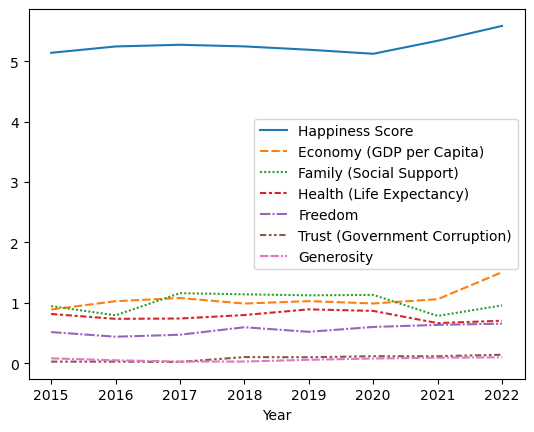

In [32]:
sns.lineplot(data=China_df)

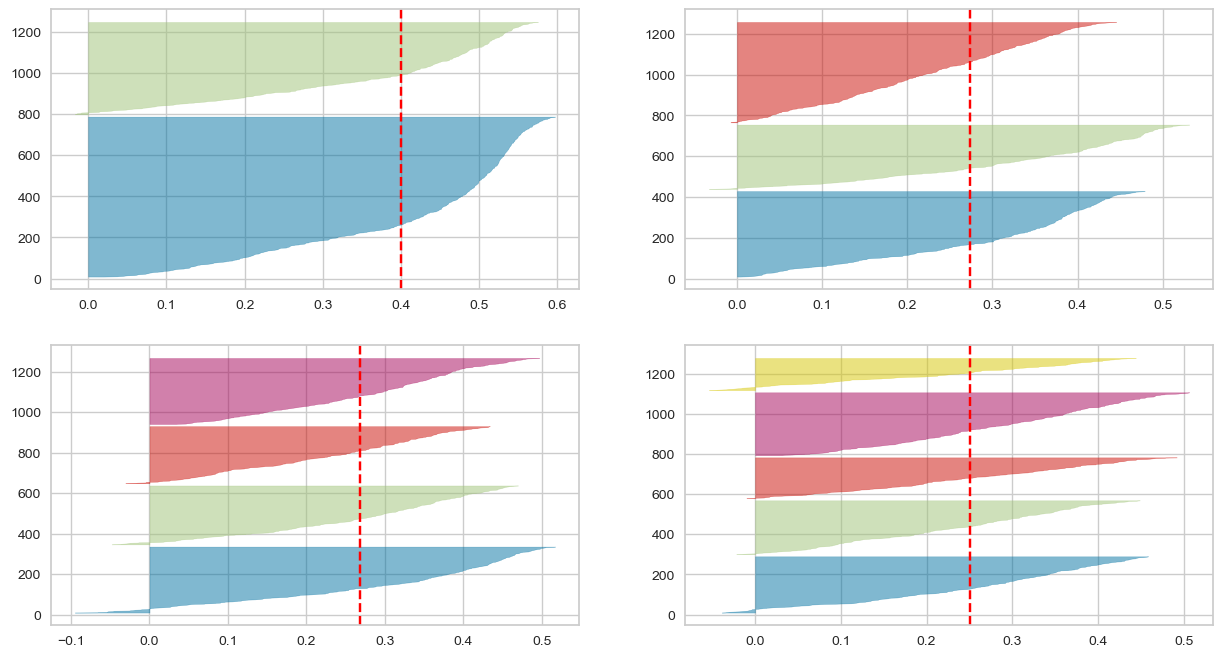

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

X = df.iloc[:,[3,4,5,6,7,8]]
y = df["Happiness Score"]
  
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df.iloc[:,[2,3,4,5,6,7,8]])


KMeans(n_clusters=4)

In [35]:
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [36]:
df['Cluster'] = labels
df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Cluster
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0,2
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0,2
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0,2
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0,2
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015.0,2


In [37]:
centroid = kmeans.cluster_centers_
centroid

array([[5.93933848, 1.16013919, 1.18630694, 0.72484939, 0.46957534,
        0.09986307, 0.16582764],
       [4.83686675, 0.79051374, 0.91009511, 0.51190694, 0.39284403,
        0.09558727, 0.19804941],
       [7.08013113, 1.46334701, 1.28554201, 0.84495858, 0.58507178,
        0.27420764, 0.264255  ],
       [3.7553199 , 0.42777273, 0.68258456, 0.29733349, 0.32181726,
        0.11372303, 0.21788468]])

In [38]:
df.groupby(by=["Cluster"]).count()[['Country']].T

Cluster,0,1,2,3
Country,421,400,212,196


In [39]:
from chart_studio import plotly 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [dict(type='choropleth',
             locations = df['Country'],
             locationmode = 'country names',
             z = df['Cluster'],
             text = df['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(geo=dict(showframe = False,
              projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)


In [40]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfBC.iloc[:,[3,4,5,6,7,8]])

labels = kmeans.labels_
dfBC['Cluster'] = labels

centroid = kmeans.cluster_centers_

print(dfBC.groupby(by=["Cluster"]).count()[['Country']].T)


data = [dict(type='choropleth',
             locations = dfBC['Country'],
             locationmode = 'country names',
             z = dfBC['Cluster'],
             text = dfBC['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(geo=dict(showframe = False,
              projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

Cluster    0    1    2    3
Country  223  216  156  186


In [41]:
from sklearn.metrics.cluster import silhouette_score
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfAC.iloc[:,[3,4,5,6,7,8]])

labels = kmeans.labels_
dfAC['Cluster'] = labels

centroid = kmeans.cluster_centers_

print(dfAC.groupby(by=["Cluster"]).count()[['Country']].T)


data = [dict(type='choropleth',
             locations = dfAC['Country'],
             locationmode = 'country names',
             z = dfAC['Cluster'],
             text = dfAC['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(geo=dict(showframe = False,
              projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

Cluster   0    1    2    3
Country  97  104  113  134


Text(0.5, 1.0, 'Logged GDP Per Capita vs Healthy Life Expectancy')

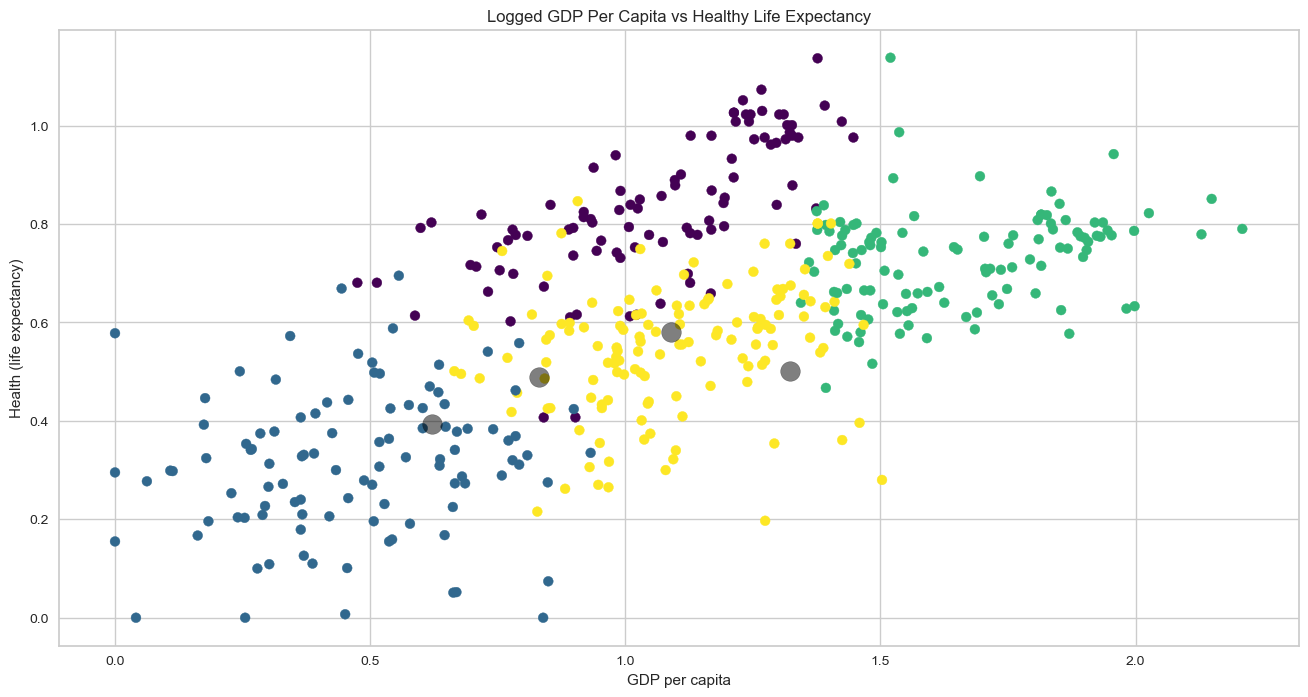

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(dfAC["Economy (GDP per Capita)"], dfAC["Health (Life Expectancy)"], c=labels, s=50, cmap='viridis')
centers = centroid
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);
plt.xlabel('GDP per capita')
plt.ylabel('Health (life expectancy)')
plt.title('Logged GDP Per Capita vs Healthy Life Expectancy')

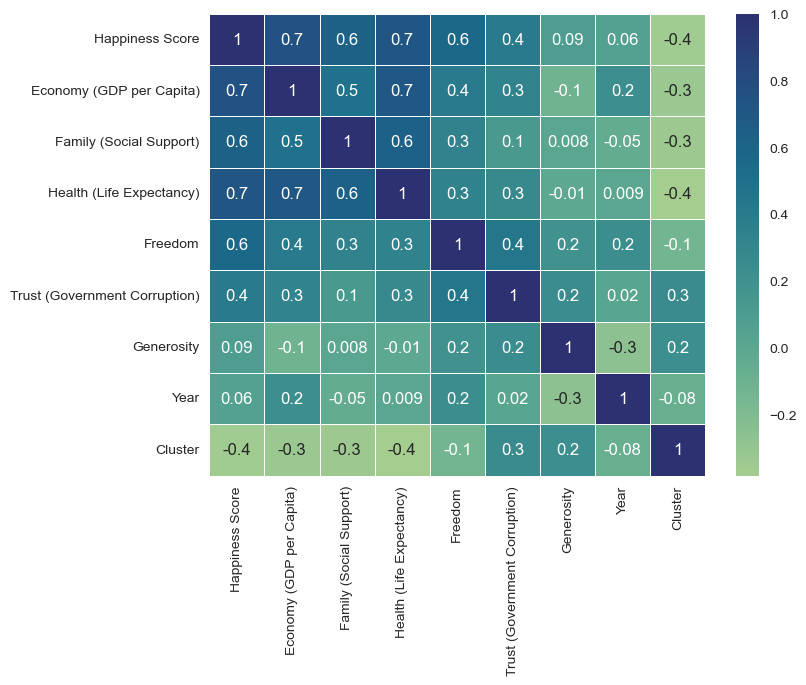

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="crest", linewidths=0.5);

In [44]:
len(df['Country'].unique())

195

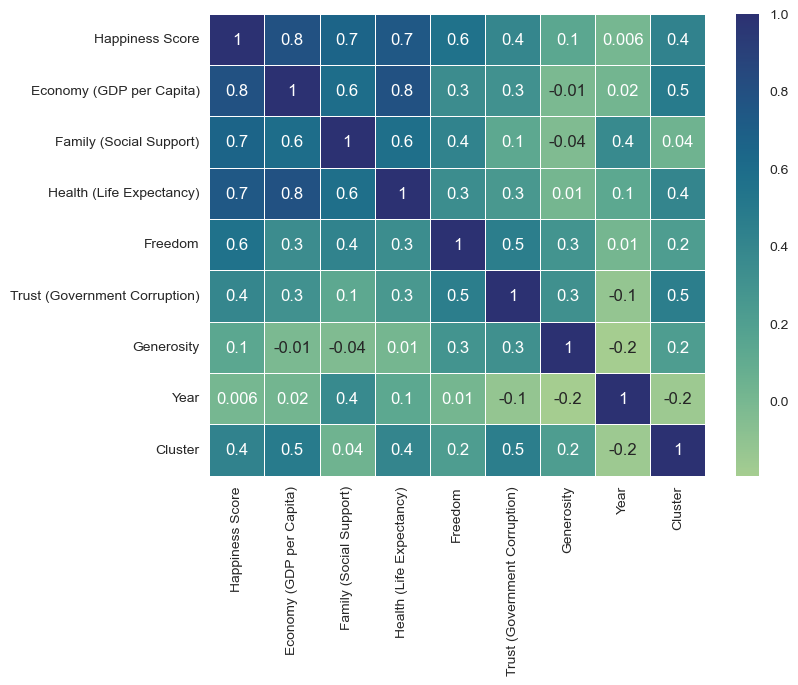

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dfBC.corr(), annot=True, fmt='.1g', cmap="crest", linewidths=0.5);

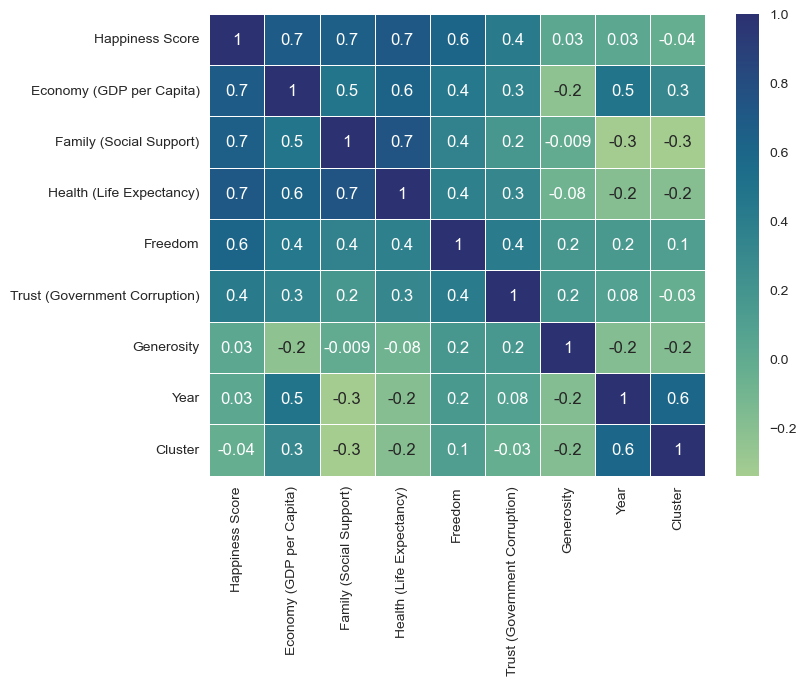

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dfAC.corr(), annot=True, fmt='.1g', cmap="crest", linewidths=0.5);